# Machine learning Project of Regression

# Part 1:

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

# Loading and splitting Dataset 

In [136]:
# Loading Dataset
url = "Part1_data12.csv"
dataset = pd.read_csv(url)

In [137]:
#Shape : Dimensions of the dataset
print("Dimension = {0:d}*{1:d}".format(dataset.shape[0],dataset.shape[1]))

Dimension = 220*2


# Randomly mix the dataset by the function simple

In [138]:
dataframe = pd.DataFrame(dataset)
dataframe_mixed = dataframe.sample(frac=1)
# dataframe_mixed

# We take 30% as a training data and 70% as a testing data

In [139]:
training_dataset = dataframe_mixed[:int(len(dataframe)*0.3)]
# training_dataset

testing_dataset  = dataframe_mixed[int(len(dataframe)*0.3):len(dataframe)]
# testing_dataset

In [140]:
# Saving training and testing dataset to a cqsv files
training_dataset.to_csv(r'training_dataset.csv', index=False, header=True)
testing_dataset.to_csv(r'testing_dataset.csv'  , index=False, header=True)

# Question 1 Read and visualize the given data.

In [141]:
training_dataset_url = "training_dataset.csv"
testing_dataset_url  = "testing_dataset.csv"

training_dataset = pd.read_csv(training_dataset_url)
testing_dataset  = pd.read_csv(testing_dataset_url)

In [142]:
# training_dataset

In [143]:
# testing_dataset 

# 1.4 Give the mean/median/min/max

In [144]:
# Calculation of the mean of x
print("mean(x) = {:.2f}".format(int(pd.DataFrame(testing_dataset['x']).mean())))

# Calculation of the median of x
print("median(x) = {:.2f}".format(int(pd.DataFrame(testing_dataset['x']).median())))

# Calculation of the max of x
print("max(x) = {:.2f}".format(int(pd.DataFrame(testing_dataset['x']).max())))

# Calculation of the min of x
print("min(x) = {:.2f}".format(int(pd.DataFrame(testing_dataset['x']).min())))

mean(x) = 12.00
median(x) = 12.00
max(x) = 23.00
min(x) = 2.00


# Question2: Use scatter plot to represent your training dataset.

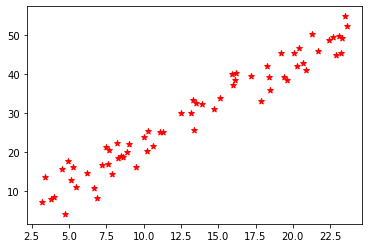

In [145]:
# Plotting the training dataset
plt.scatter(training_dataset['x'], training_dataset['y'], c = 'red', marker = '*')

In [146]:
# Plotting the training dataset with hypotesis function
def plot_h(w):
    data = pd.DataFrame(trainig_dataset['x'])
    plt.scatter(training_dataset['x'], training_dataset['y'], c = 'red', marker = '*')
    plt.plot([data.min(),data.max()],[h(data.min(),w),h(data.max(),w)], linewidth=4)

# Question5:

# The hypothesis function. 

In [12]:
# The hypothesis function. 
def h(x,w):
    return w[1]*x + w[0]

# The empirical error

# Mean Squared Error(MSE)

In [13]:
# The empirical error MSE
def MSE(w):
    MSE = 0
    for i in range(len(training_dataset)):
        MSE = MSE + pow((training_dataset['y'][i] - h(training_dataset['x'][i],w)),2)
    return MSE/len(training_dataset)

# Root-Mean-Squared-Error(RMSE).

In [15]:
# The empirical error RMSE
def RMSE(w):
    return np.sqrt(MSE(w))

# Mean-Absolute-Error(MAE).

In [52]:
# The empirical error MAE
def MAE(w):
    MAE = float(0)
    for i in range(len(training_dataset)):
        MAE = MAE + np.abs((training_dataset['y'][i] - h(training_dataset['x'][i],w)))
    return MAE/len(training_dataset)

In [116]:
# Calculation of the gradient
def gradient(w, empiricalError = MSE):
    grad = []
    wi = [0.0000, 0.0000]
    for i in range(2):
        for k in range(2):
            wi[k] = w[k]
        wi[i] = wi[i] + 1e-10
        grad.append((empiricalError(wi) - empiricalError(w))/1e-10)
    return grad

# Calculation of step Armijo

In [117]:
# Calculation of the step Armijo
def armijo(wk, dk, empiricalError = MSE):
    alpha = 1
    X = 0.25*alpha*np.matmul(gradient(wk,empiricalError), dk)
    while empiricalError(np.add(wk, np.multiply(alpha,dk))) - empiricalError(wk) > X:
        alpha = alpha/2
        X = 0.25*alpha*np.matmul(gradient(wk,empiricalError), dk)
    return alpha

# Gradient Descent Method

In [118]:
# Gradient descent method
def gradientDescent(delta, wk, empiricalError = MSE):
    gk = np.multiply(-1,gradient(wk))
    alpha = 0
    k = 0
    while k<10:
        alpha = armijo(wk,gk, empiricalError)
        wk = np.add(wk, np.multiply(alpha,gk))
        gk = np.multiply(-1,gradient(wk, empiricalError))
        k = k+1
    return wk
# print("{0:d}- Ls = {1:.2f}".format(int(k),float(empiricalError(wk))))

In [134]:
# Calculation of the regression model for each empirical error
w_optim_MAE  = gradientDescent(0.1, [1,1],  MAE) # MAE
print("w* = [{0:.2f}, {1:.2f}], Emp_Error = {2:.2f} ".format(w_optim_MAE[0],w_optim_MAE[1],MAE(w_optim_MAE)))
w_optim_MSE  = gradientDescent(0.1, [1,1],  MSE) # MSE
print("w* = [{0:.2f}, {1:.2f}], Emp_Error = {2:.2f} ".format(w_optim_MSE[0],w_optim_MSE[1],MSE(w_optim_MSE)))
w_optim_RMSE = gradientDescent(0.1, [1,1], RMSE) # RMSE
print("w* = [{0:.2f}, {1:.2f}], Emp_Error = {2:.2f} ".format(w_optim_RMSE[0],w_optim_RMSE[1],MSE(w_optim_RMSE)))

w* = [1.07, 2.14], Emp_Error = 2.81 
w* = [1.09, 2.12], Emp_Error = 12.69 
w* = [1.09, 2.12], Emp_Error = 12.68 


[1.07136247 2.13582877]


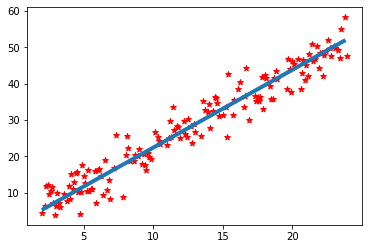

In [123]:
# MAE
plot_h(w_optim_MAE)

[1.08903961 2.12247642]


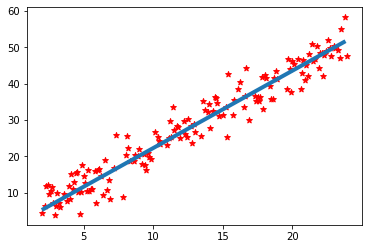

In [124]:
# MSE
plot_h(w_optim_MSE)

[1.08971393 2.12445574]


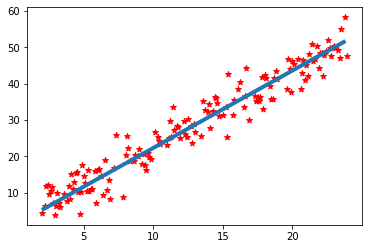

In [127]:
# RMSE
plot_h(w_optim_RMSE)